**Procrastinate Pro+**

Компания по предоставлению развлекательных сервисов, несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки. Требуется разобраться в причинах и помочь компании выйти в плюс.

Для анализа будут применяться данные о визитах, заказах и ценах на рекламу за период: с 1 мая 2019 года по 27 октября 2019 года.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`.
- заказы: `/datasets/orders_info_short.csv`.
- расходы: `/datasets/costs_info_short.csv`.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

Первым делом нужно загрузить все библиотеки, которые будут использоваться в проекте. Затем загрузить файлы и взглянуть на их содержимое.

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [ ]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [ ]:
print(visits.head())
print(orders.head())
print(costs.head())

        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-

После предварительного просмотра содержимого нужно выяснить, в каком формате находится содержимое столбцов каждого датафрейма и привести в удобный для анализа вид.

In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [ ]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [ ]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [ ]:
costs['dt_1'] = pd.to_datetime(costs['dt']).dt.date
costs['dt'] = pd.to_datetime(costs['dt'])

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
 3   dt_1     1800 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 56.4+ KB


In [ ]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [ ]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [ ]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dt_1       0
dtype: int64

In [ ]:
visits.duplicated().sum()

0

In [ ]:
orders.duplicated().sum()

0

In [ ]:
costs.duplicated().sum()

0

In [ ]:
visits = visits.rename(columns = {'User Id': 'user_id',
                         'Region':'region',
                         'Device':'device',
                         'Channel':'channel',
                         'Session Start': 'session_start',
                        'Session End':'session_end'})
orders = orders.rename(columns = {'User Id': 'user_id',
                        'Event Dt': 'event_dt',
                        'Revenue':'revenue'})
costs = costs.rename(columns ={'Channel':'channel'})

В ходе подготовки данных к анализу было проверено наличие дубликатов, пропусков, неверные форматы даты и времени, неудобных для работы заголовков. \
В ходе предобработки были исправлены названия колонок, а дата приведена к формату datetime

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [ ]:
def get_profiles(visits, orders):

    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # проверьте, есть ли ID пользователей из profiles в orders
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique()) # ваш код здесь

    return profiles

In [ ]:
profiles = get_profiles(visits, orders)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False


In [ ]:
def get_retention(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=dimensions,
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

In [ ]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
def get_ltv_profiles(sessions, orders, events, ad_costs, event_names=[]):
    ltv_profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    ltv_profiles['dt_1'] = ltv_profiles['first_ts'].dt.date
    ltv_profiles['month'] = ltv_profiles['first_ts'].astype('datetime64[M]')
    ltv_profiles['payer'] = ltv_profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            ltv_profiles[event] = ltv_profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    new_users = (
        ltv_profiles.groupby(['dt_1', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt_1', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    ltv_profiles = ltv_profiles.merge(
        ad_costs[['dt_1', 'channel', 'acquisition_cost']],
        on=['dt_1', 'channel'],
        how='left',
    )
    ltv_profiles['acquisition_cost'] = ltv_profiles['acquisition_cost'].fillna(0)
    ltv_profiles = ltv_profiles.loc[ltv_profiles['channel'] != 'organic']

    return ltv_profiles

In [ ]:
events = None
ltv_profiles = get_ltv_profiles(visits, orders, events, costs.drop(columns = 'dt'))

In [ ]:
def get_ltv(
    ltv_profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = ltv_profiles.query('dt_1 <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt_1'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [ ]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [ ]:
def plot_retention(retention):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержания первого дня
    retention = retention.drop(columns=['cohort_size', 0])

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке — кривые удержания неплатящих
    ax2 = plt.subplot(2, 2, 2)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    plt.show()

In [ ]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt_1']]
    filtered_data = ltv_history.pivot_table(
        index='dt_1', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt_1']]
    filtered_data = cac_history.pivot_table(
        index='dt_1', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt_1']]
    filtered_data = roi_history.pivot_table(
        index='dt_1', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [ ]:
profiles = get_profiles(visits, orders)
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

print('Минимальная дата: ', min_date, 'Максимальная дата: ', max_date)

Минимальная дата:  2019-05-01 Максимальная дата:  2019-10-27


Благодаря предобработке удалось создать профили пользователей и без труда определить максимальную и минимальную дату привлечения пользователей. Полученные результаты совпадают с первоначальным условием, поэтому можно заявить, что отсутствуют ошибки в полученном датасете.

In [ ]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150008 entries, 0 to 150007
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   150008 non-null  int64         
 1   first_ts  150008 non-null  datetime64[ns]
 2   channel   150008 non-null  object        
 3   device    150008 non-null  object        
 4   region    150008 non-null  object        
 5   dt        150008 non-null  object        
 6   month     150008 non-null  datetime64[ns]
 7   payer     150008 non-null  bool          
dtypes: bool(1), datetime64[ns](2), int64(1), object(4)
memory usage: 8.2+ MB


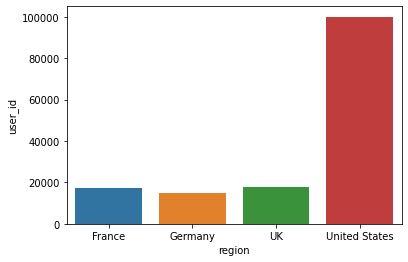

In [ ]:
profiles_region = profiles.groupby(['region']).nunique().reset_index()
sb.barplot(x='region', y='user_id', data=profiles_region);

          region  payer  user_id   percent
0         France    663    17450  3.799427
2             UK    700    17575  3.982930
1        Germany    616    14981  4.111875
3  United States   6902   100002  6.901862


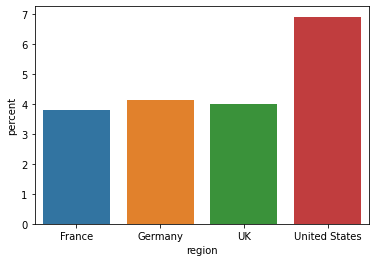

In [ ]:
profiles_payer_region = profiles.loc[:,['region','payer']].groupby(['region']).sum().reset_index()
profiles_payer_region['user_id'] = profiles_region['user_id']
profiles_payer_region['percent'] = profiles_payer_region['payer']/profiles_payer_region['user_id']*100
print(profiles_payer_region.sort_values(by = 'percent'))
sb.barplot(x='region', y='percent', data=profiles_payer_region);

Графики показывают, что большая часть пользователей приходится на США. Кроме того, клиенты из США гораздо чаще становятся покупателями, нежели представители других стран.

    device  payer  user_id   percent
2       PC   1537    30455  5.046790
0  Android   2050    35032  5.851793
3   iPhone   3382    54479  6.207897
1      Mac   1912    30042  6.364423


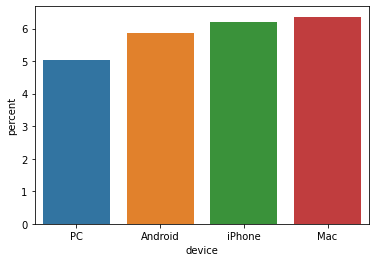

In [ ]:
payers_device = profiles.loc[:,['payer', 'device']].groupby(['device']).sum().reset_index()
payers_device['user_id'] = profiles.groupby(['device']).nunique().reset_index()['user_id']
payers_device['percent'] = payers_device['payer']/payers_device['user_id']*100
print(payers_device.sort_values(by = 'percent'))
sb.barplot(x='device', y='percent', data=payers_device.sort_values(by = 'percent'));

Данные показывают, что наибольшая доля платящих пользователей приходится на владельцев техники эпл. Тем не менее разница между максимальным и минимальным значением всего 1,3%. Плюс еще имеется большая разница между количеством пользователей с разных устройств. Так, компьютером  пользуется в 2 раза меньше людей, чем айфоном и это обстоятельство могло повлиять на итоговый результат. Более того, нельзя исключать вероятность наткнуться на парадокс Симпсона. Для этого стоит продолжить разглядывать данные во всех возможных разрезах.

               channel  payer  user_id    percent
10             organic   1160    56439   2.055316
4   OppleCreativeMedia    233     8605   2.707728
2              LeapBob    262     8553   3.063253
3         MediaTornado    156     4364   3.574702
8              YRabbit    165     4312   3.826531
7       WahooNetBanner    453     8553   5.296387
5       RocketSuperAds    352     4448   7.913669
6               TipTop   1878    19561   9.600736
9       lambdaMediaAds    225     2149  10.469986
0           AdNonSense    440     3880  11.340206
1             FaceBoom   3557    29144  12.204914


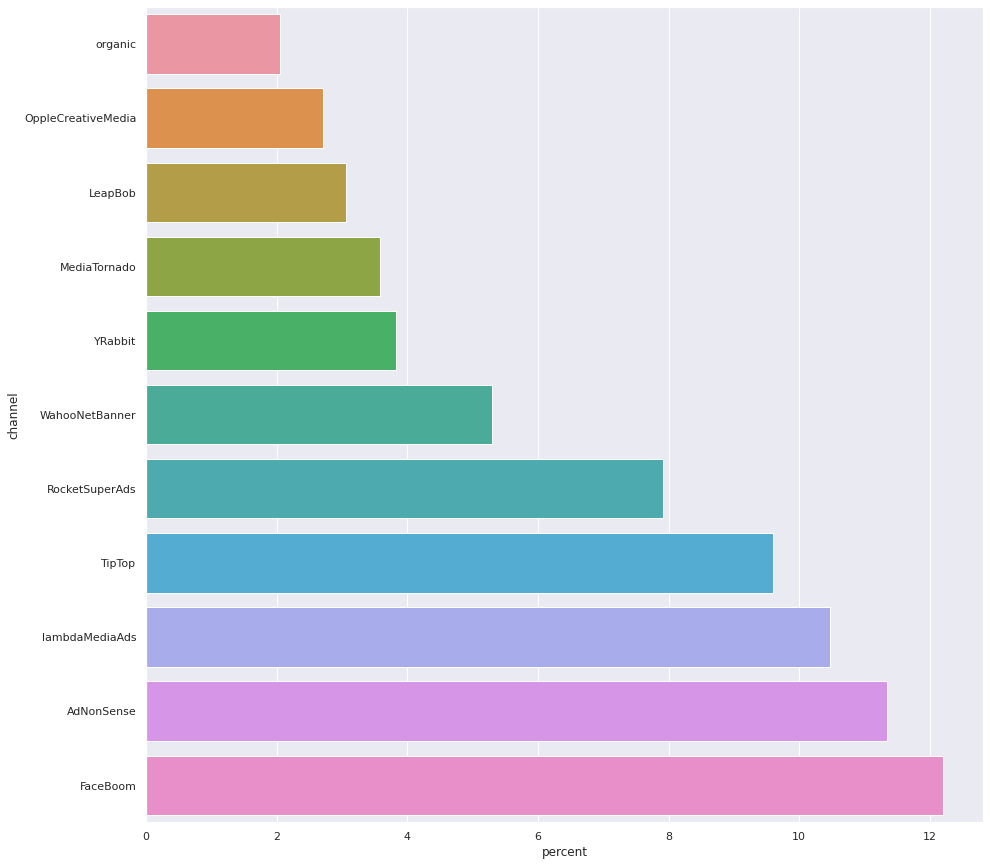

In [ ]:
payers_channel = profiles.loc[:,['payer', 'channel']].groupby(['channel']).sum().reset_index()
payers_channel['user_id'] = profiles.groupby(['channel']).nunique().reset_index()['user_id']
payers_channel['percent'] = payers_channel['payer']/payers_channel['user_id']*100
print(payers_channel.sort_values(by = 'percent'))
sb.set(rc={'figure.figsize':(15,15)})
sb.barplot(y='channel', x='percent', data=payers_channel.sort_values(by = 'percent'));

Судя по полученной гистограмме наибольшая доля платящих пользователей приходится на FaceBoom. Наименьшую долю покупок совершили пользователи, которые перешли на  сайт напрямую.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [ ]:
total_costs = costs["costs"].sum().round()
total_costs

105497.0

Общие расходы на рекламу составили 105,5 тыс. руб. В целом, кажется, что неплохо, учитывая количество покупок пользователей - около 8 тыс. покупок, можно сказать, что на каждого покупателя было потрачено 10-15 рублей. Но так ли это хорошо? Возможно, расходы можно сократить? Или, например, увеличить расходы в на определенных площадках, или странах? Дальнейший анализ покажет.

In [ ]:
costs_channel = costs.groupby('channel').sum().sort_values(by = 'costs')
costs_channel['percent'] = costs_channel['costs']/costs_channel['costs'].sum()*100
costs_channel

,costs,percent
channel,,
YRabbit,944.22,0.895018
MediaTornado,954.48,0.904744
lambdaMediaAds,1557.60,1.476436
LeapBob,1797.60,1.703930
RocketSuperAds,1833.00,1.737485
OppleCreativeMedia,2151.25,2.039152
AdNonSense,3911.25,3.707441
WahooNetBanner,5151.00,4.882589
FaceBoom,32445.60,30.754910


Самые большие траты на рекламу у TipTop и FaceBoom, оно и понятно, ведь эти источники входят в первую пятерку платящих пользователей. Но что же с остальными лидерами? Несмотря на относительно небольшие затраты на рекламу на этих площадках они показали отличный результат по платящим пользователям. Может высокие расходы на рекламу и не являются гарантией качеста? Дальнейший анализ покажет где истина.

In [ ]:
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs

,dt,channel,costs,dt_1,week,month
0,2019-05-01,FaceBoom,113.3,2019-05-01,18,5
1,2019-05-02,FaceBoom,78.1,2019-05-02,18,5
2,2019-05-03,FaceBoom,85.8,2019-05-03,18,5
3,2019-05-04,FaceBoom,136.4,2019-05-04,18,5
4,2019-05-05,FaceBoom,122.1,2019-05-05,18,5
...,...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,2019-10-23,43,10
1796,2019-10-24,lambdaMediaAds,6.4,2019-10-24,43,10
1797,2019-10-25,lambdaMediaAds,8.8,2019-10-25,43,10
1798,2019-10-26,lambdaMediaAds,8.8,2019-10-26,43,10


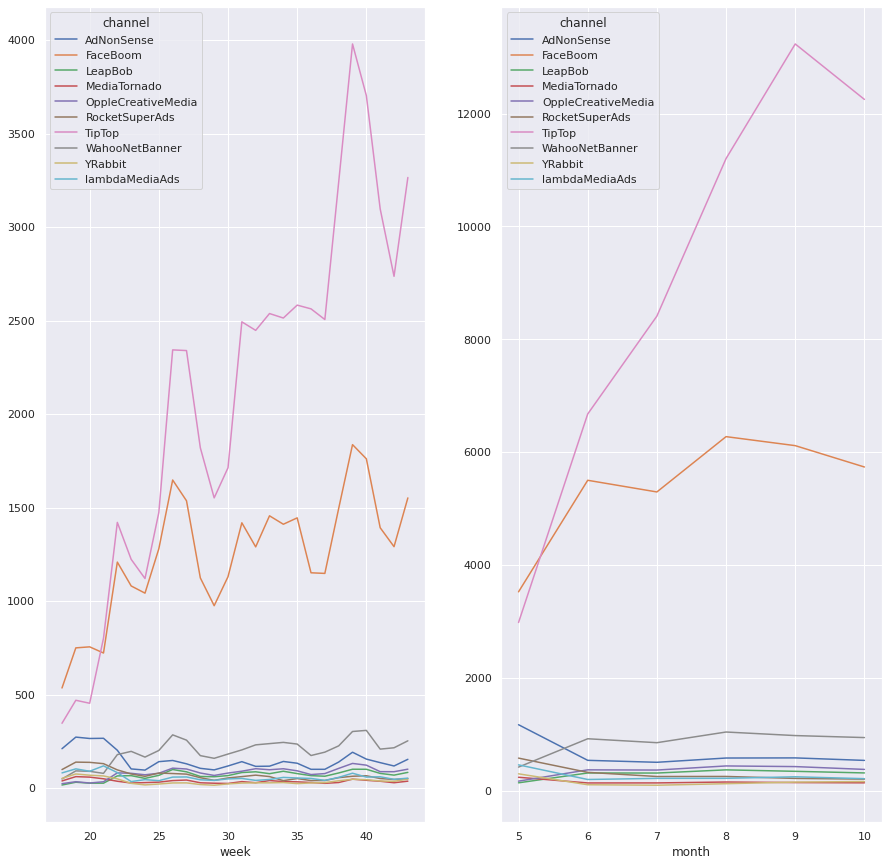

In [ ]:
costs_week = costs.drop(columns = 'month').pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum')
costs_week.plot(ax=plt.subplot(1, 2, 1));
costs_month = costs.drop(columns = 'week').pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum')
costs_month.plot(ax=plt.subplot(1, 2, 2));

Оба графика показывают, что расходы на TipTop и FaceBoom постоянно растут, в то время, как на другие каналы расходы совсем не изменились. Не совсем понятен смысл повышать расходы в 8 раз для довольно сомнительного результата. Ни один нормальный бизнес не растет такими темпами. Для сравнения: в некоторых компаниях рост бизнеса в 2 раза за год уже считается очень хорошим показателем, а мы рассматриваем данные за полгода. Да, бывают исключения: крохотный бизнес, получивший хорошие инвестиции может вырасти и в 10, и в 100 раз, и то, если товар уникальный. Однако в нашем примере такого условия нет, это всего лишь развлекательная платформа, коих полно на рынке, поэтому нужно сократить расходы на рекламу хотя бы до уровня июля.

In [ ]:
channel_users = costs.groupby('channel').agg('sum').merge(payers_channel, on = 'channel')
channel_users['mean_users'] = channel_users['costs']/channel_users['user_id']
channel_users['mean_payers'] = channel_users['costs']/channel_users['payer']
print(channel_users.drop(columns = ['month', 'week', 'percent']).sort_values(by = 'mean_payers'))

              channel     costs  payer  user_id  mean_users  mean_payers
5      RocketSuperAds   1833.00    352     4448    0.412095     5.207386
8             YRabbit    944.22    165     4312    0.218975     5.722545
3        MediaTornado    954.48    156     4364    0.218717     6.118462
2             LeapBob   1797.60    262     8553    0.210172     6.861069
9      lambdaMediaAds   1557.60    225     2149    0.724802     6.922667
0          AdNonSense   3911.25    440     3880    1.008054     8.889205
1            FaceBoom  32445.60   3557    29144    1.113286     9.121619
4  OppleCreativeMedia   2151.25    233     8605    0.250000     9.232833
7      WahooNetBanner   5151.00    453     8553    0.602245    11.370861
6              TipTop  54751.30   1878    19561    2.799003    29.154047


Поразительные результаты, во первых сразу видно, что некоторые каналы очень дорого обходятся. Так, канал TipTop за каждого клиента получает почти 3 рубля, при том, что они еще не стали покупателями, а вот за каждого покупателя вообще почти 30 рублей. Даже если клиентов и много, то это еще не значит, что на них можно столько тратить. Те же каналы, на которые тратилось не очень много, привлекли привлекательную долю как обычных клиентов, так и платящих.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

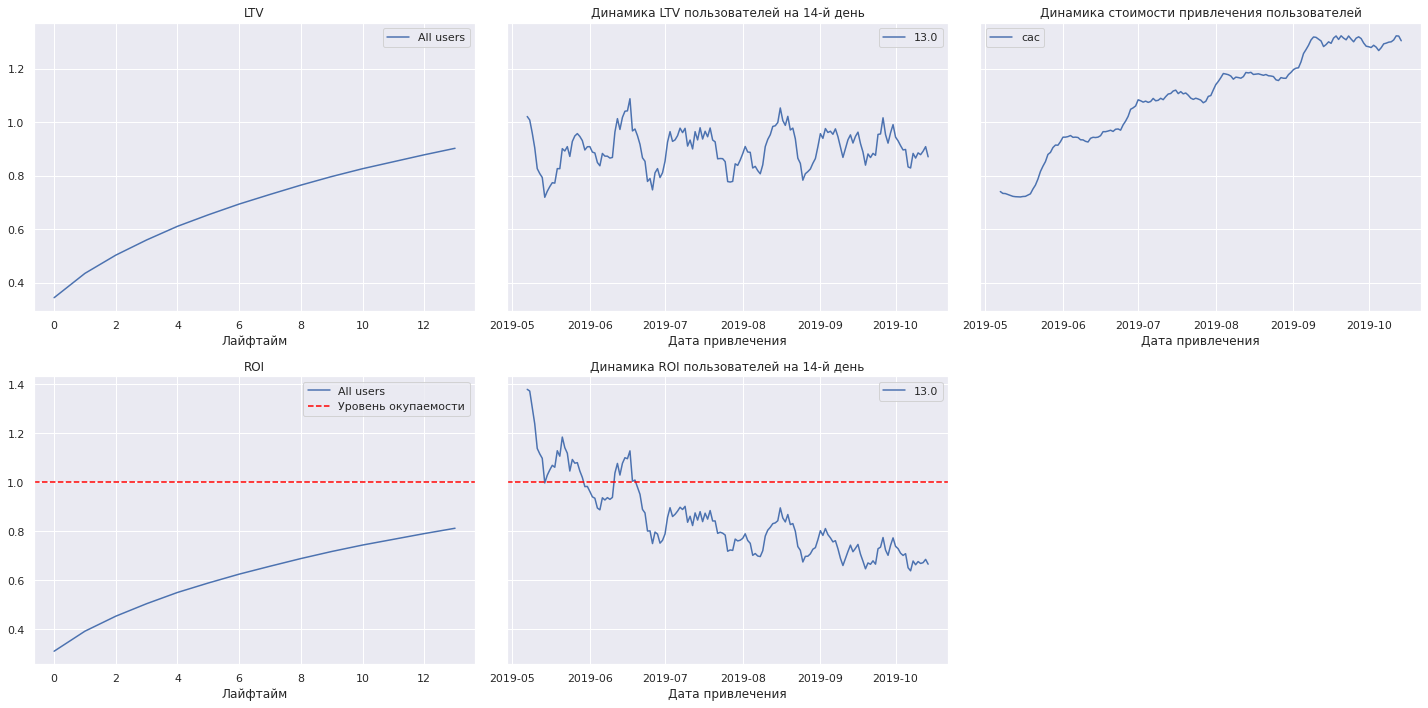

In [ ]:
horizon_days = 14
observation_date = datetime(2019, 10, 27).date()
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    ltv_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Получилась интересная картина, LTV пользователей растет нормально, нет резких изменений, в то время как CAC стремительно начал расти. Это признак неэффективного менеджмента. Деньги тратятся впустую. Более того, динамика LTV практически не изменилась, как была в промежутке между 0.6 и 0.8, так и осталась. Отсюда вывод: качество пользователей не зависит от расходов на рекламу, не нужно на каждого пользователя тратить по 80 копеек, если он ничем не отличается от пользователя, привлеченного за 40 копеек. Тогда и ROI выровняется. Скорее всего нужно еще разобраться с персоналом компании, но это уже совсем другая история.

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

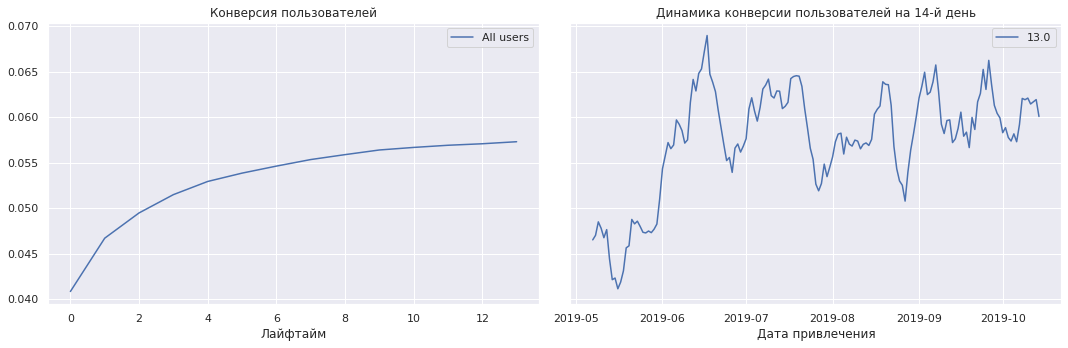

In [ ]:
plot_conversion(conversion, conversion_history, horizon_days)

Конверсия растет, но очень медленно. Кроме того, ее динамика постоянно скачет.

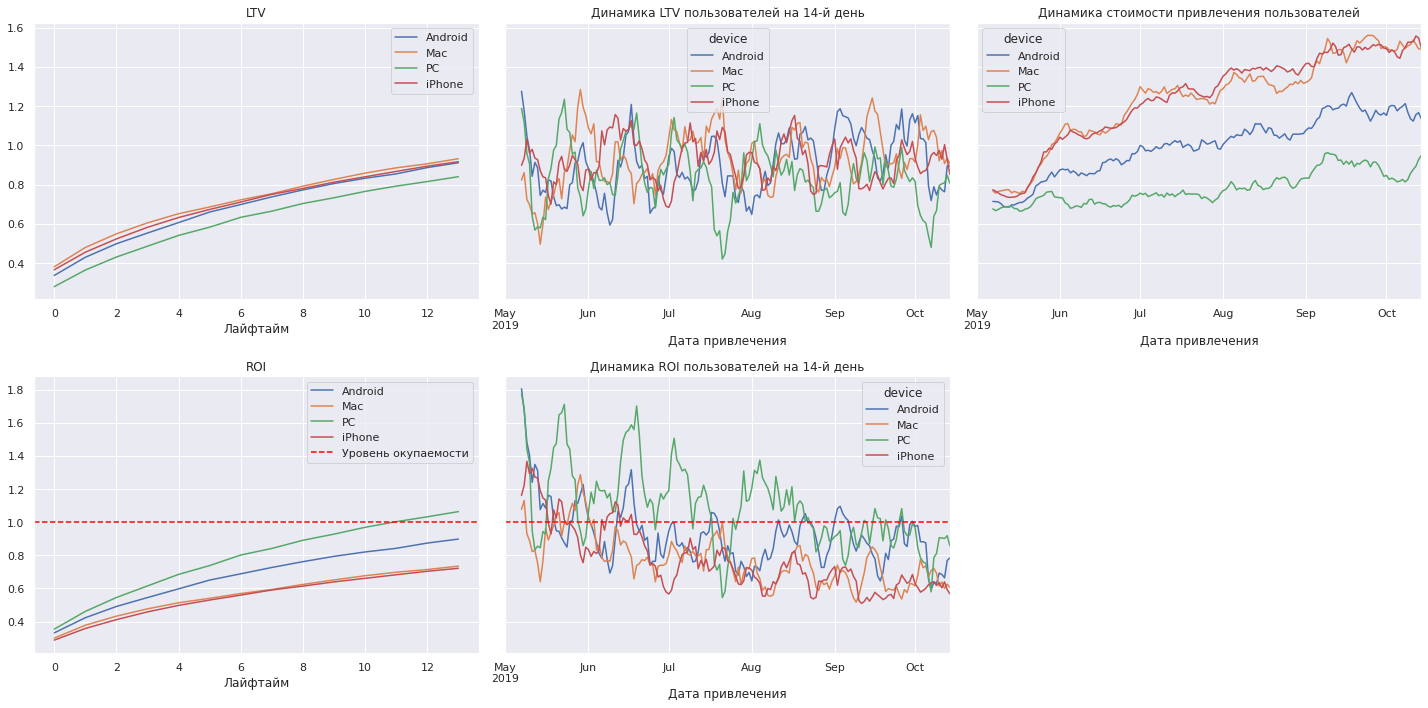

In [ ]:
horizon_days = 14
observation_date = datetime(2019, 10, 27).date()
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    ltv_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Сложновато читать графики такого рода, но, если рассматривать каждый график по отдельности, то можно сделать следующие выводы:\
LTV - в целом, больших различий по устройствам не видно, конечно, кроме PC. Хотя, учитывая, что люди все чаще обращаются для поиска информации к своему телефону, удивляться нечему. \
Динамика LTV - тоже заметных лидеров и аудсайдеров не наблюдается, есть небольшие отличия у пользователей андроида, но это несущественно и не может влиять на результаты анализа. \
Динамика стоимости привлечения - эпл вырывается в лидеры по затратам на рекламу. Это объяснимо вполне: данной техникой пользуется наиболее платежеспособное население, поэтому и реклама там может обходиться дороже. \
ROI - возможно, результат неожиданный, но что поделать? Пользователи техники эпл не окупаются вообще. Они приносят сплошные убытки по той простой причине, что завышены ожидания от пользователей айфона и мака. \
Динамика ROI на 14 день показывает, как пользователи айфона и мака тащат компанию на дно. Они перестали приносить доход уже в июне, а траты на них только росли.

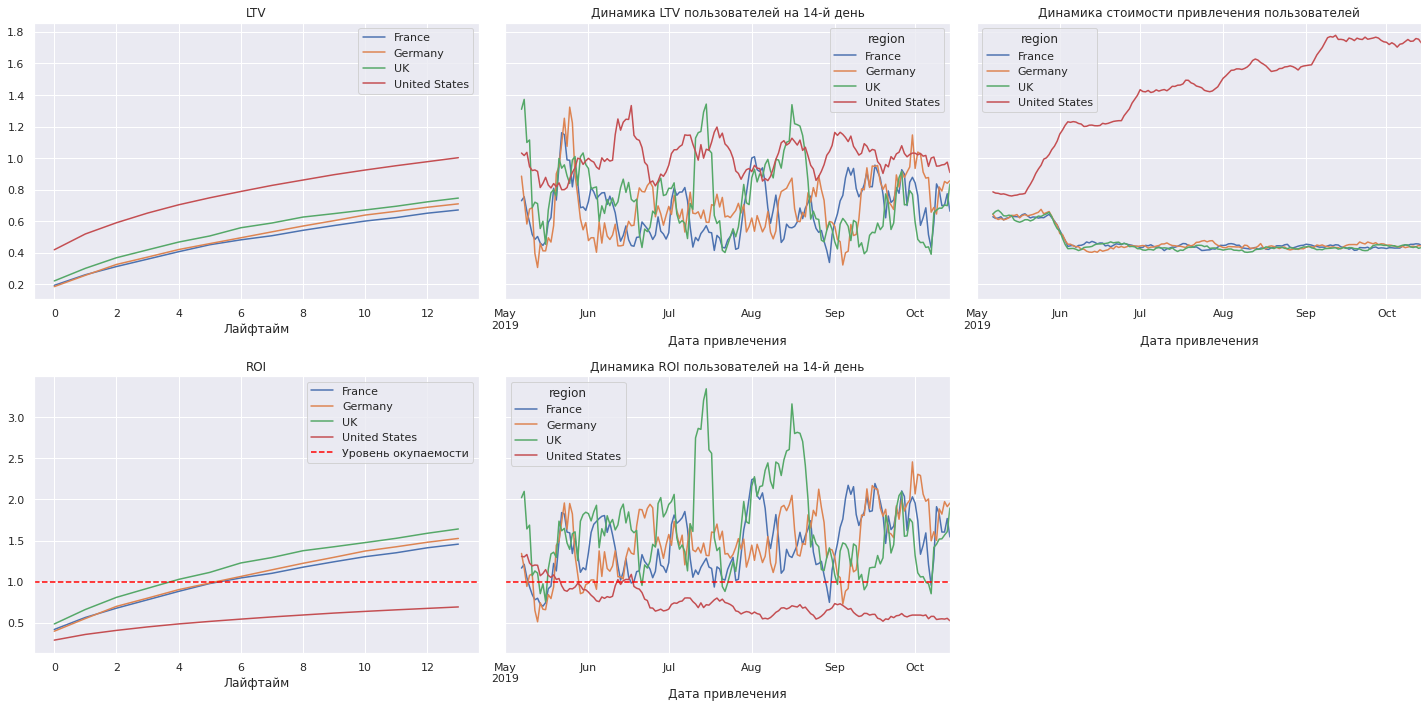

In [ ]:
horizon_days = 14
observation_date = datetime(2019, 10, 27).date()
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    ltv_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Снова неожиданные результаты. Разберем по отдельности: \
LTV - стандартная картина как растет показатель с течением времени. США показали лучший результат, но это еще не гарантирует прибыли. \
Динамика LTV - видны пиковые значения у пользователей из США и Великобритании, но заявлять о каких-то явных различиях не приходится. Вполне похоже на нормальное ведение бизнеса. Есть еще такой момент: у разных стран могут быть праздники в разные месяцы, допустим, или какие-нибудь традиции, что, естественно, будет отражаться на результатах. \
Динамика стоимости привлечения - вот здесь уже какие-то заоблачные суммы на привлечение клиентов из США. Да, конечно, в США пользователей гораздо больше, но платят они едва ли в 2 раза чаще остальных, а затраты на них в 4 раза больше. На привлечение пользователей из США нужно поставить какое-нибудь ограничение, ведь иначе, компания останется без средств к существованию. \
ROI - отчетливо видно, что не окупаются именно пользователи из Америки, что было уже понятно из прежнего графика. \
Динамика ROI на 14 день тоже показывает, что с июня, именно с того месяца, когда был резкий рост по затратам, американцы не окупались совсем.

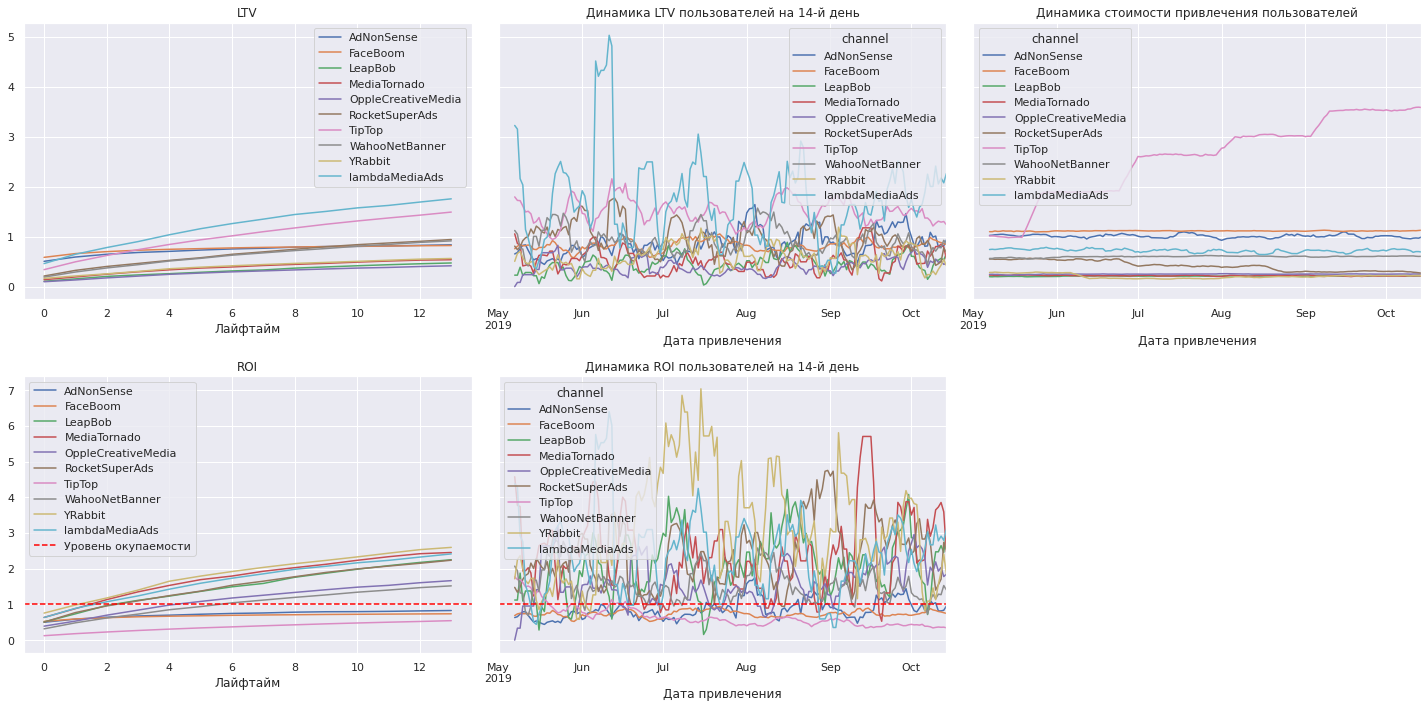

In [ ]:
horizon_days = 14
observation_date = datetime(2019, 10, 27).date()
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    ltv_profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14)

Здесь уже выстраивается более-менее понятная картина. Давайте рассмотрим: \
LTV - видны явные лидеры - каналы LambdaMediaAds и TipTop, 4 канала показали неплохой результат и почти дошли до единицы - FaceBoom, AdNonSense, YahooNetBanner, RocketSuperAds, остальные каналы практически не проявили себя, LTV мало чем отличается от бесплатных пользователей. Возникает вопрос: зачем на них деньги тратить? \
Динамика LTV - также виден очень хорошо канал LambdaMediaAds, за ним следует TipTop, 3 место делят каналы RocketSuperAds и AdNonSense. Все остальные каналы не показывают нормальных результатов, опять непонятно за что платятся деньги. \
Динамика стоимости привлечения - как ни странно, оказывается, что за аутсайдеров компания практически и не платит, что очень хорошо, но при этом тратятся космические суммы каналу TipTop, сомнительно, что этот канал стоит таких денег. \
ROI - вот здесь уже видны явные проблемы, каналы FaceBoom, TipTop и AdNonSense, на которые возлагались большие надежды совсем не окупаются. В то же время, все остальные каналы, которые, может быть, не показали хороших результатов по доходам, вполне окупаются. Компания получает немного, но тратит на это немного. Видимо поговорка "тише едешь - дальше будешь" именно про этот случай. \
Динамика ROI на 14 день только подтверждает вывод, сделанный выше.

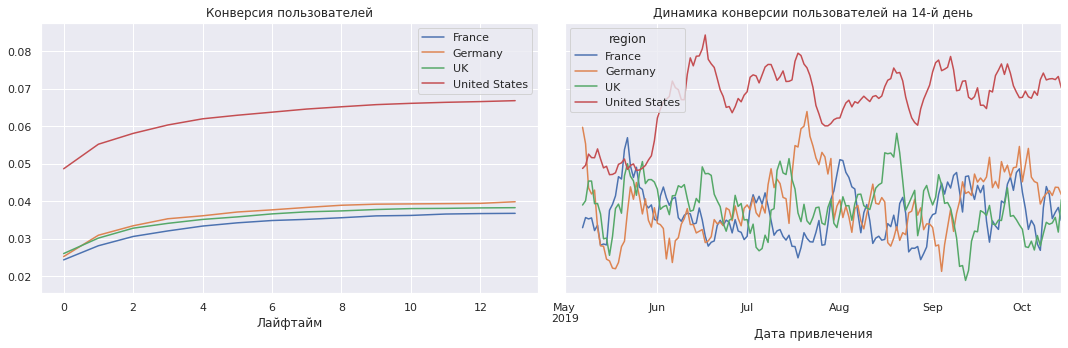

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, horizon_days)

Конверсия по странам указывает на высокую конверсию у жителей США, в том числе и на 14 день.

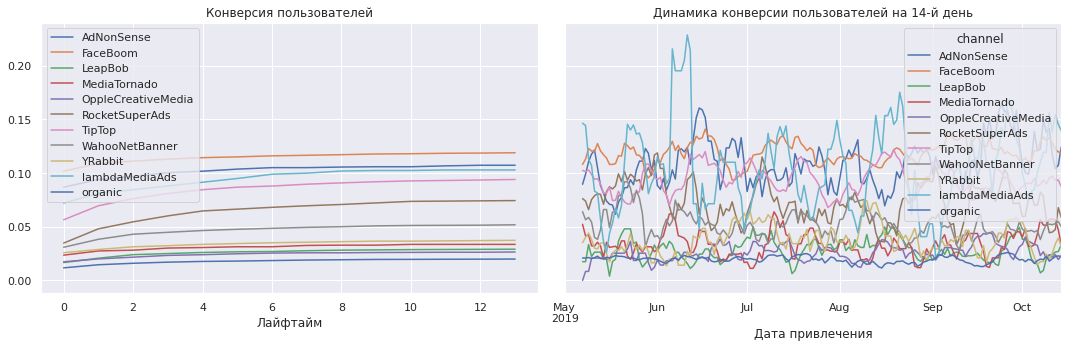

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, horizon_days)

Каналы FaceBoom, AdnonSense, LambdaMediaAds показывают высокий уровень конверсии.

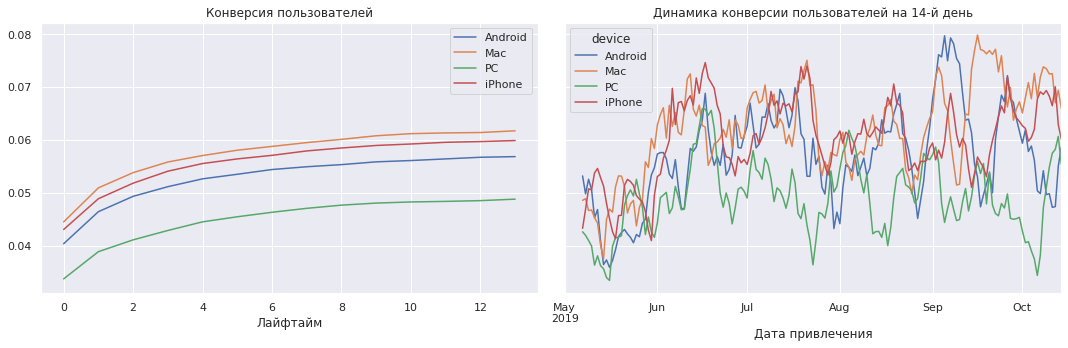

In [ ]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, horizon_days)

У пользователей техники эпл наблюдается максимальная конверсия, в сентябре высокой конверсией обладали также пользователи андроида, конверсия пользователей компьютеров самая низкая.

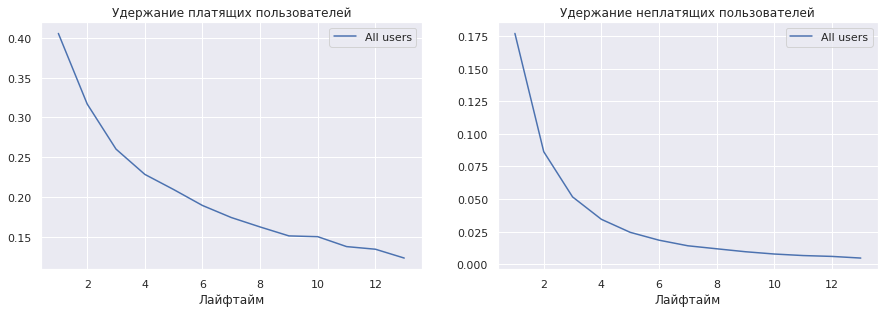

In [ ]:
retention_raw, retention = get_retention(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)
retention_raw, retention
plot_retention(retention)

Общее удержание пользователей оставляет желать лучшего, менее 15% пользователей пользуются сервисом на 14 день.

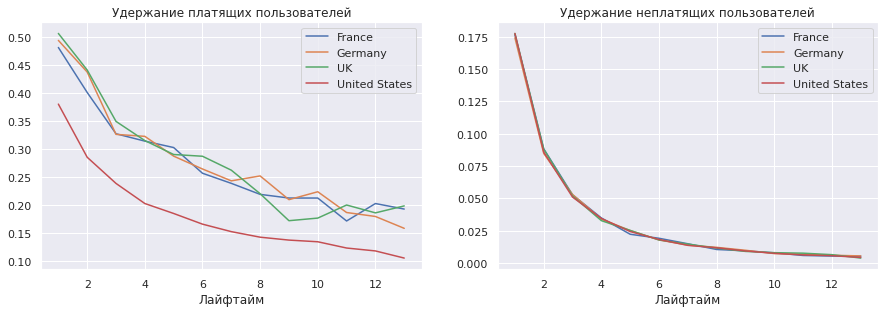

In [ ]:
retention_raw, retention = get_retention(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)
retention_raw, retention
plot_retention(retention)

На данном графике видно, что пользователи из США удерживаются хуже всего, при том что на них тратится несоизмеримо больше. Возможно, нужно сделать сервис более комфортным для жителей этой страны.

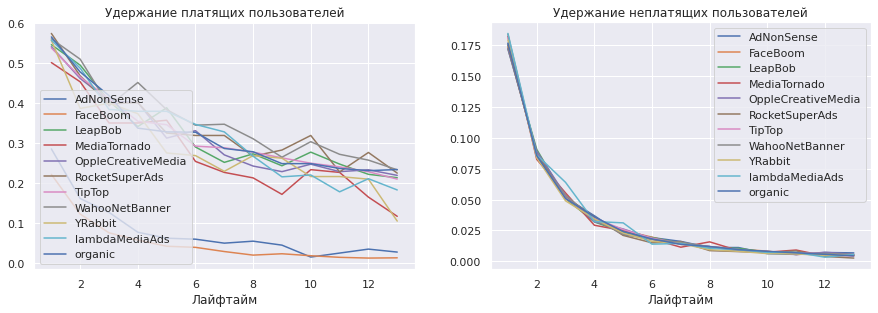

In [ ]:
retention_raw, retention = get_retention(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)
retention_raw, retention
plot_retention(retention)

Каналы FaceBoom и AdNonSense удерживают клиентов хуже всего, даже бесплатные клиенты "organic" удерживаются лучше. Может быть что-то не так с рекламой на этих платформах, ведь люди заходят и теряют интерес практически мгновенно.

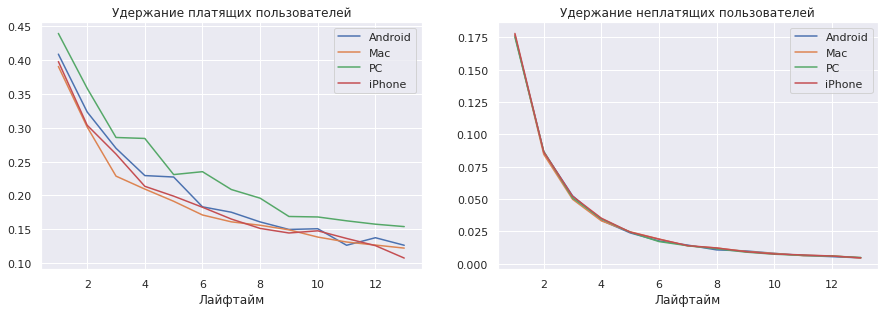

In [ ]:
retention_raw, retention = get_retention(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)
retention_raw, retention
plot_retention(retention)

Сильных различий между устройствами не наблюдается, полльзователи PC удерживаются лучше всего, хотя их меньше. Возможно, это те самые, что называется "качественные" пользователи. Они меньше пользуются сервисом, но долго не теряют к нему интереса.

В качестве отдельной проверки, посмотрим какие каналы привлекают пользователей из европы, а какие из США.

In [ ]:
profiles.loc[profiles['region'] == 'United States'].groupby('channel').count()

,user_id,first_ts,device,region,dt,month,payer
channel,,,,,,,
FaceBoom,29144,29144,29144,29144,29144,29144,29144
MediaTornado,4364,4364,4364,4364,4364,4364,4364
RocketSuperAds,4448,4448,4448,4448,4448,4448,4448
TipTop,19561,19561,19561,19561,19561,19561,19561
YRabbit,4312,4312,4312,4312,4312,4312,4312
organic,38173,38173,38173,38173,38173,38173,38173


In [ ]:
profiles.loc[profiles['region'] != 'United States'].groupby('channel').count()

,user_id,first_ts,device,region,dt,month,payer
channel,,,,,,,
AdNonSense,3880,3880,3880,3880,3880,3880,3880
LeapBob,8553,8553,8553,8553,8553,8553,8553
OppleCreativeMedia,8605,8605,8605,8605,8605,8605,8605
WahooNetBanner,8553,8553,8553,8553,8553,8553,8553
lambdaMediaAds,2149,2149,2149,2149,2149,2149,2149
organic,18266,18266,18266,18266,18266,18266,18266


Проверка показала, что "проблемные" каналы FaceBoom и AdNonSense находятся в разных группах. Значит проблема скрывается, не в регионе рекламы.

Посмотрим отдельно пользователей PC и всех остальных

In [ ]:
profiles.loc[profiles['device'] == 'PC'].groupby('channel').count()

,user_id,first_ts,device,region,dt,month,payer
channel,,,,,,,
AdNonSense,1563,1563,1563,1563,1563,1563,1563
FaceBoom,3008,3008,3008,3008,3008,3008,3008
LeapBob,3402,3402,3402,3402,3402,3402,3402
MediaTornado,453,453,453,453,453,453,453
OppleCreativeMedia,3496,3496,3496,3496,3496,3496,3496
RocketSuperAds,466,466,466,466,466,466,466
TipTop,2012,2012,2012,2012,2012,2012,2012
WahooNetBanner,3409,3409,3409,3409,3409,3409,3409
YRabbit,482,482,482,482,482,482,482


In [ ]:
profiles.loc[profiles['device'] != 'PC'].groupby('channel').count()

,user_id,first_ts,device,region,dt,month,payer
channel,,,,,,,
AdNonSense,2317,2317,2317,2317,2317,2317,2317
FaceBoom,26136,26136,26136,26136,26136,26136,26136
LeapBob,5151,5151,5151,5151,5151,5151,5151
MediaTornado,3911,3911,3911,3911,3911,3911,3911
OppleCreativeMedia,5109,5109,5109,5109,5109,5109,5109
RocketSuperAds,3982,3982,3982,3982,3982,3982,3982
TipTop,17549,17549,17549,17549,17549,17549,17549
WahooNetBanner,5144,5144,5144,5144,5144,5144,5144
YRabbit,3830,3830,3830,3830,3830,3830,3830


Сразу попадаются на глаза каналы FaceBoom и TipTop, они не окупаются по разным причинам, и они привлекают с PC почти в 10 раз меньше людей, чем с других операционных систем, у других каналов разница между PC и не PC не такая большая, поэтому не сильно влияет на конечный результат.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Результаты анализа оказались неожиданными. Сначала была видна красивая картинка о привлечении пользователей, удержании, количестве и прочее. Но в самом конце все оказалось не так однозначно. \
Основная проблема отдела маркетинга - слишком высокие расходы на рекламу. Стоит пересмотреть условия сотрудничества с каналами TipTop и FaceBoom, так как стоимость рекламы непропорционально высокая. \
Анализ удержания в разрезе стран показал, что пользователи из США имеют самый низкий результат. Дальнейший анализ показал, что большая часть пользователей, не учитывая "organic", приходится на канал FaceBoom, отличающийся как низким удержанием, так и высокой стоимостью рекламы. \
Канал AdNonSense, привлекающий пользователей из Европейских стран демонстрирует низкое удержание платящих пользователей. Несмотря на то, что на канал не тратится очень много средств, за счет того, что пользователи со второго дня теряют интерес к сервису, компания терпит убытки. \
Тем не менее компании стоит продолжить развитие как на американском, так и на европейском рынке, так как большая часть каналов, окупилась уже на второй день, а европейский lambdaMediaAds показал лучший результат по динамике конверсии пользователей. \
Ситуация по устройствам показывает, пользователи PC хуже конверсируются, но вместе с тем, они лучше удерживаются и именно пользователи PC окупаются в отличие от всех остальных операционных систем. Основным преимуществом оказалось то, что пользователи PC в 10 раз реже пользуются такими каналами как TipTop и FaceBoom, которые показали одни из худших результатов по окупаемости. \
Отделу маркетинга, наверное, стоило бы уделить больше внимания таким каналам как lambdaMediaAds, LeapBob, RocketSuperAds, YRabbit, MediaTornado. Эти каналы окупились уже на второй день, поэтому стоит продолжить сотрудничество именно с ними.